<a href="https://colab.research.google.com/github/MartinFarres/HalloweenCandy-Heirarchical-Clustering/blob/main/candy_Heirarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candy Heirarchical Clustering

## Load, Info and Preprocesing ( Standarization ) Data

In [410]:
import pandas as pd

df_candy = pd.read_csv('candy-data.csv')

In [411]:
display(df_candy.head())
display(df_candy.info())

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


None

## Column Info

- **chocolate**: Does it contain chocolate?

- **fruity**: Is it fruit flavored?

- **caramel**: Is there caramel in the candy?

- **peanutalmondy**: Does it contain peanuts, peanut butter or almonds?

- **nougat**: Does it contain nougat?

- **crispedricewafer**: Does it contain crisped rice, wafers, or a cookie component?

- **hard**: Is it a hard candy?

- **bar**: Is it a candy bar?

- **pluribus**: Is it one of many candies in a bag or box?

- **sugarpercent**: The percentile of sugar it falls under within the data set.

- **pricepercent**: The unit price percentile compared to the rest of the set.

- **winpercent**: The overall win percentage according to 269,000 matchups.




In [412]:
from sklearn.preprocessing import StandardScaler

df_numeric = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

display(df_scaled.head())

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1.138990,-0.899172,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594
1,1.138990,-0.899172,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594
2,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594
3,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594
4,-0.877971,1.112134,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594


## Hierarchical clustering



In [413]:
from scipy.cluster.hierarchy import linkage

linked = linkage(df_scaled, method='ward')

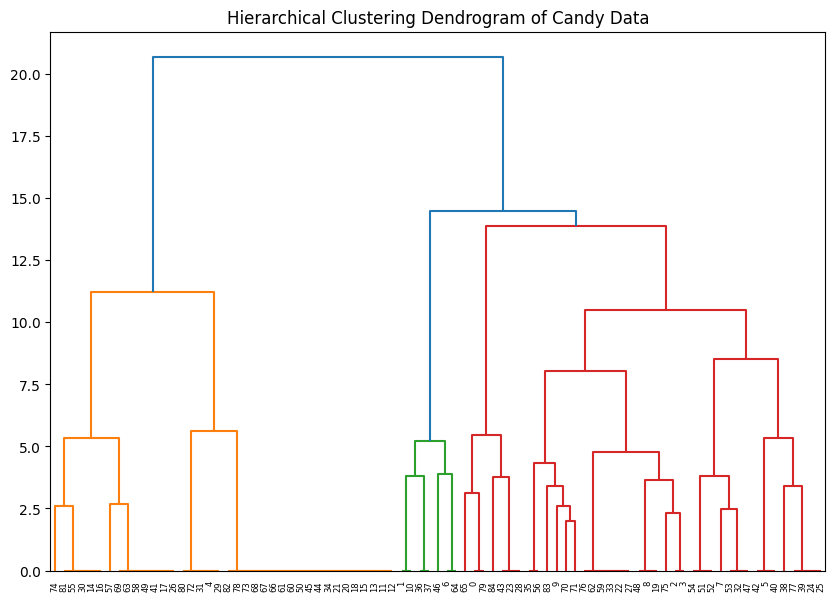

In [414]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram of Candy Data")
plt.show()

## Analisis



In [415]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

df_candy['cluster'] = clusters

display(df_candy.head())

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,4
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,4
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [416]:
cluster_means = df_candy.groupby('cluster')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean()
display(cluster_means)

for cluster_id in sorted(df_candy['cluster'].unique()):
    print(f"\nCluster {cluster_id} Characteristics:")
    cluster_df = df_candy[df_candy['cluster'] == cluster_id]
    display(cluster_df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean().sort_values(ascending=False))

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
cluster,,,,,,,,,
1,0.026316,0.973684,0.000000,0.000000,0.0,0.0,0.368421,0.000000,0.710526
2,0.857143,0.000000,0.571429,0.428571,1.0,0.0,0.000000,1.000000,0.000000
3,1.000000,0.000000,0.428571,0.142857,0.0,1.0,0.000000,0.857143,0.142857
4,0.696970,0.030303,0.212121,0.303030,0.0,0.0,0.030303,0.242424,0.484848



Cluster 1 Characteristics:


,0
fruity,0.973684
pluribus,0.710526
hard,0.368421
chocolate,0.026316
caramel,0.000000
nougat,0.000000
peanutyalmondy,0.000000
crispedricewafer,0.000000
bar,0.000000



Cluster 2 Characteristics:


,0
nougat,1.000000
bar,1.000000
chocolate,0.857143
caramel,0.571429
peanutyalmondy,0.428571
fruity,0.000000
crispedricewafer,0.000000
hard,0.000000
pluribus,0.000000



Cluster 3 Characteristics:


,0
chocolate,1.000000
crispedricewafer,1.000000
bar,0.857143
caramel,0.428571
peanutyalmondy,0.142857
pluribus,0.142857
fruity,0.000000
nougat,0.000000
hard,0.000000



Cluster 4 Characteristics:


,0
chocolate,0.696970
pluribus,0.484848
peanutyalmondy,0.303030
bar,0.242424
caramel,0.212121
hard,0.030303
fruity,0.030303
nougat,0.000000
crispedricewafer,0.000000


## With pca


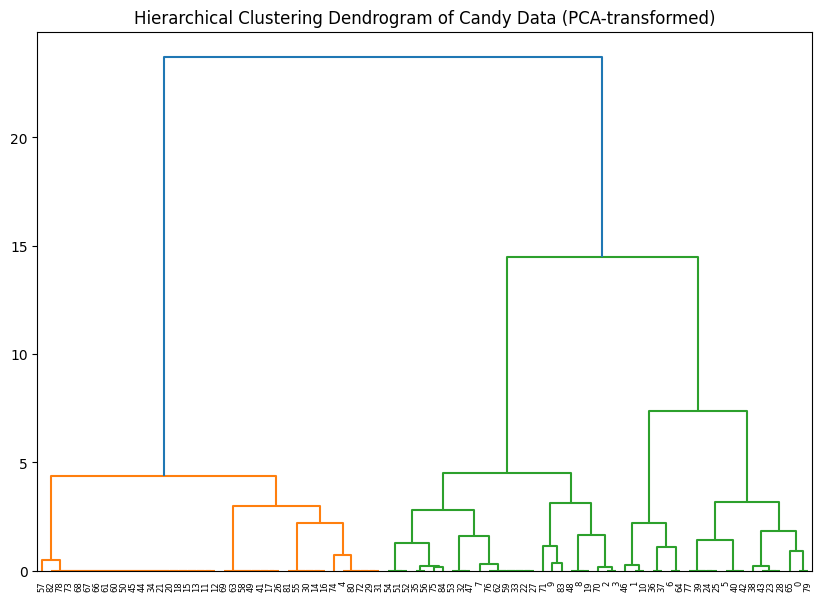

In [417]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Drop winpercent, sugarpercent and pricepercent for PCA
df_numeric_pca = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_numeric_pca), columns=df_numeric_pca.columns)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_pca)

# Perform hierarchical clustering on PCA-transformed data
linked_pca = linkage(df_pca, method='ward')

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_pca)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (PCA-transformed)")
plt.show()

In [418]:
from scipy.cluster.hierarchy import fcluster

# Based on visual inspection of the PCA dendrogram, let's choose 4 clusters again for comparison.
num_clusters_pca = 4
clusters_pca = fcluster(linked_pca, num_clusters_pca, criterion='maxclust')

df_candy['cluster_pca'] = clusters_pca

display(df_candy.head())

# Analyze and interpret the characteristics of the clusters formed after PCA
cluster_means_pca = df_candy.groupby('cluster_pca')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean()
display(cluster_means_pca)

for cluster_id_pca in sorted(df_candy['cluster_pca'].unique()):
    print(f"\nPCA Cluster {cluster_id_pca} Characteristics:")
    cluster_df_pca = df_candy[df_candy['cluster_pca'] == cluster_id_pca]
    display(cluster_df_pca[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean().sort_values(ascending=False))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster,cluster_pca
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3,4
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,4,2
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,4,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1,1


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
cluster_pca,,,,,,,,,
1,0.026316,0.973684,0.000000,0.000000,0.0,0.000000,0.368421,0.0,0.710526
2,0.615385,0.038462,0.230769,0.269231,0.0,0.038462,0.038462,0.0,0.653846
3,0.857143,0.000000,0.571429,0.428571,1.0,0.000000,0.000000,1.0,0.000000
4,1.000000,0.000000,0.285714,0.285714,0.0,0.428571,0.000000,1.0,0.000000



PCA Cluster 1 Characteristics:


,0
fruity,0.973684
pluribus,0.710526
hard,0.368421
chocolate,0.026316
caramel,0.000000
nougat,0.000000
peanutyalmondy,0.000000
crispedricewafer,0.000000
bar,0.000000



PCA Cluster 2 Characteristics:


,0
pluribus,0.653846
chocolate,0.615385
peanutyalmondy,0.269231
caramel,0.230769
fruity,0.038462
hard,0.038462
crispedricewafer,0.038462
nougat,0.000000
bar,0.000000



PCA Cluster 3 Characteristics:


,0
nougat,1.000000
bar,1.000000
chocolate,0.857143
caramel,0.571429
peanutyalmondy,0.428571
fruity,0.000000
crispedricewafer,0.000000
hard,0.000000
pluribus,0.000000



PCA Cluster 4 Characteristics:


,0
chocolate,1.000000
bar,1.000000
crispedricewafer,0.428571
caramel,0.285714
peanutyalmondy,0.285714
nougat,0.000000
fruity,0.000000
hard,0.000000
pluribus,0.000000


## Results

In [419]:
from sklearn.metrics import silhouette_score

silhouette_ward = silhouette_score(df_scaled, clusters)
silhouette_ward_pca = silhouette_score(df_pca, clusters_pca)

print("Comparison of Clustering Results (without PCA vs. with PCA):")
print(f"\nSilhouette score without PCA (Ward linkage): {silhouette_ward:.4f}")
print(f"Silhouette score with PCA (Ward linkage): {silhouette_ward_pca:.4f}")

print("\nCluster Means (without PCA):")
display(cluster_means)
print("\nCluster Means (with PCA):")
display(cluster_means_pca)

Comparison of Clustering Results (without PCA vs. with PCA):

Silhouette score without PCA (Ward linkage): 0.3677
Silhouette score with PCA (Ward linkage): 0.6343

Cluster Means (without PCA):


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
cluster,,,,,,,,,
1,0.026316,0.973684,0.000000,0.000000,0.0,0.0,0.368421,0.000000,0.710526
2,0.857143,0.000000,0.571429,0.428571,1.0,0.0,0.000000,1.000000,0.000000
3,1.000000,0.000000,0.428571,0.142857,0.0,1.0,0.000000,0.857143,0.142857
4,0.696970,0.030303,0.212121,0.303030,0.0,0.0,0.030303,0.242424,0.484848



Cluster Means (with PCA):


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
cluster_pca,,,,,,,,,
1,0.026316,0.973684,0.000000,0.000000,0.0,0.000000,0.368421,0.0,0.710526
2,0.615385,0.038462,0.230769,0.269231,0.0,0.038462,0.038462,0.0,0.653846
3,0.857143,0.000000,0.571429,0.428571,1.0,0.000000,0.000000,1.0,0.000000
4,1.000000,0.000000,0.285714,0.285714,0.0,0.428571,0.000000,1.0,0.000000


## Hierarchical clustering with different linkages (without pca)




In [420]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['single', 'complete', 'average']
cluster_labels = {}

df_numeric_no_win = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
scaler_no_win = StandardScaler()
df_scaled_no_win = pd.DataFrame(scaler_no_win.fit_transform(df_numeric_no_win), columns=df_numeric_no_win.columns)


for linkage_method in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    labels = agg_clustering.fit_predict(df_scaled_no_win)
    cluster_labels[linkage_method] = labels

display(cluster_labels)

{'single': array([1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3]),
 'complete': array([1, 2, 3, 3, 0, 1, 2, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        3, 1, 1, 1, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1,
        0, 0, 2, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 1, 0, 0, 0, 0, 3]),
 'average': array([2, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
        0, 2, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 0, 2,
        3, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 1, 2,
        3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 0, 2])}

## Analysis and results (without pca)




In [421]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for method, labels in cluster_labels.items():
    score = silhouette_score(df_scaled_no_win, labels)
    silhouette_scores[method] = score
    print(f"Silhouette score for {method} linkage: {score:.4f}")

best_method = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest linkage method based on silhouette score: {best_method}")

Silhouette score for single linkage: 0.2782
Silhouette score for complete linkage: 0.3842
Silhouette score for average linkage: 0.4385

Best linkage method based on silhouette score: average


## Hierarchical clustering with different linkages (with pca)


In [422]:
linkage_methods_pca = ['single', 'complete', 'average']
cluster_labels_pca = {}

# Drop winpercent, sugarpercent and pricepercent for PCA
df_numeric_pca_no_win = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
df_scaled_pca_no_win = pd.DataFrame(scaler.fit_transform(df_numeric_pca_no_win), columns=df_numeric_pca_no_win.columns)

# Apply PCA again after dropping columns
pca_no_win = PCA(n_components=2)
df_pca_no_win = pca_no_win.fit_transform(df_scaled_pca_no_win)

for linkage_method in linkage_methods_pca:
    agg_clustering_pca = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    labels_pca = agg_clustering_pca.fit_predict(df_pca_no_win)
    cluster_labels_pca[linkage_method] = labels_pca

display(cluster_labels_pca)

{'single': array([3, 2, 0, 0, 1, 3, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 3, 3, 3, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 2, 2, 3, 3, 3, 1, 3, 3,
        1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 3,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 3, 1, 1, 1, 0, 0]),
 'complete': array([1, 3, 0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 3, 3, 1, 1, 1, 2, 1, 1,
        2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 3, 1,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0]),
 'average': array([1, 3, 0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 3, 3, 1, 1, 1, 2, 1, 1,
        2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 3, 1,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0])}

## Analysis and results (with pca)




In [423]:
from sklearn.metrics import silhouette_score

silhouette_scores_pca = {}
for method, labels in cluster_labels_pca.items():
    score = silhouette_score(df_pca_no_win, labels)
    silhouette_scores_pca[method] = score
    print(f"Silhouette score for {method} linkage (PCA-transformed data): {score:.4f}")

best_method_pca = max(silhouette_scores_pca, key=silhouette_scores_pca.get)
print(f"\nBest linkage method for PCA-transformed data based on silhouette score: {best_method_pca}")

Silhouette score for single linkage (PCA-transformed data): 0.6815
Silhouette score for complete linkage (PCA-transformed data): 0.6815
Silhouette score for average linkage (PCA-transformed data): 0.6815

Best linkage method for PCA-transformed data based on silhouette score: single


## Results (without pca vs. with pca)



In [424]:
print(f"Best silhouette score without PCA ('average' linkage): {silhouette_scores['average']:.4f}")
print(f"Best silhouette score with PCA ('average' linkage): {silhouette_scores_pca['average']:.4f}")

print("\nCluster characteristics without PCA ('average' linkage):")
# Recalculate cluster_means without the dropped columns
cluster_means_no_win = df_candy.groupby('cluster')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean()
display(cluster_means_no_win.loc[df_candy.groupby('cluster')['winpercent'].mean().sort_values(ascending=False).index].T)

print("\nCluster characteristics with PCA ('average' linkage):")
# Recalculate cluster_means_pca without the dropped columns
cluster_means_pca_no_win = df_candy.groupby('cluster_pca')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean()
display(cluster_means_pca_no_win.loc[df_candy.groupby('cluster_pca')['winpercent'].mean().sort_values(ascending=False).index].T)

Best silhouette score without PCA ('average' linkage): 0.4385
Best silhouette score with PCA ('average' linkage): 0.6815

Cluster characteristics without PCA ('average' linkage):


cluster,3,2,4,1
chocolate,1.000000,0.857143,0.696970,0.026316
fruity,0.000000,0.000000,0.030303,0.973684
caramel,0.428571,0.571429,0.212121,0.000000
peanutyalmondy,0.142857,0.428571,0.303030,0.000000
nougat,0.000000,1.000000,0.000000,0.000000
crispedricewafer,1.000000,0.000000,0.000000,0.000000
hard,0.000000,0.000000,0.030303,0.368421
bar,0.857143,1.000000,0.242424,0.000000
pluribus,0.142857,0.000000,0.484848,0.710526



Cluster characteristics with PCA ('average' linkage):


cluster_pca,4,3,2,1
chocolate,1.000000,0.857143,0.615385,0.026316
fruity,0.000000,0.000000,0.038462,0.973684
caramel,0.285714,0.571429,0.230769,0.000000
peanutyalmondy,0.285714,0.428571,0.269231,0.000000
nougat,0.000000,1.000000,0.000000,0.000000
crispedricewafer,0.428571,0.000000,0.038462,0.000000
hard,0.000000,0.000000,0.038462,0.368421
bar,1.000000,1.000000,0.000000,0.000000
pluribus,0.000000,0.000000,0.653846,0.710526


- Chocoarroz Barra | Rhodesia -> Cluster 3
- M&M Avellanas con Chocolate  -> Cluster 4
- Mogul Frutales -> Cluster 1
- Bolsa de Caramelos Pico Dulce | Cereal Trix -> Cluster 2

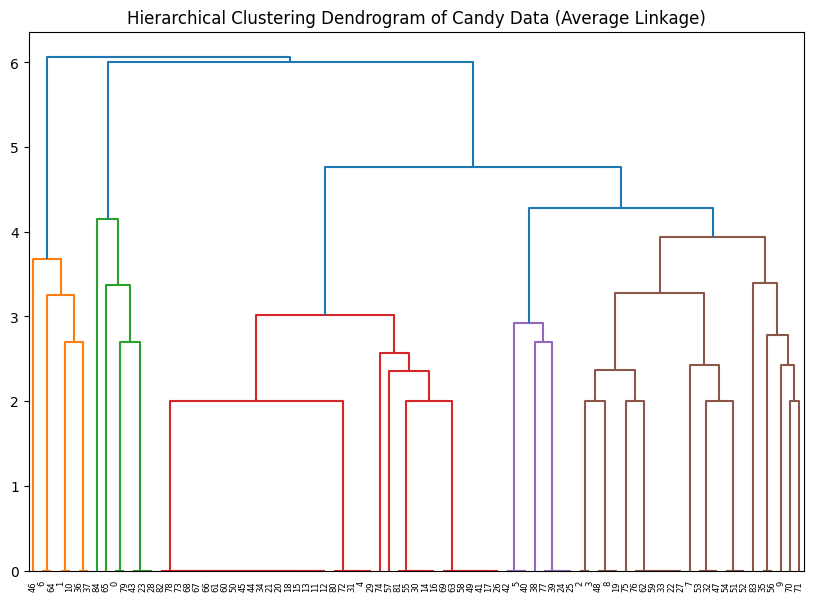

In [425]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Drop winpercent, sugarpercent and pricepercent for dendrogram
df_numeric_dendro = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
scaler_dendro = StandardScaler()
df_scaled_dendro = pd.DataFrame(scaler_dendro.fit_transform(df_numeric_dendro), columns=df_numeric_dendro.columns)

# Dendrogram for 'average' linkage without PCA
linked_average = linkage(df_scaled_dendro, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked_average)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (Average Linkage)")
plt.show()

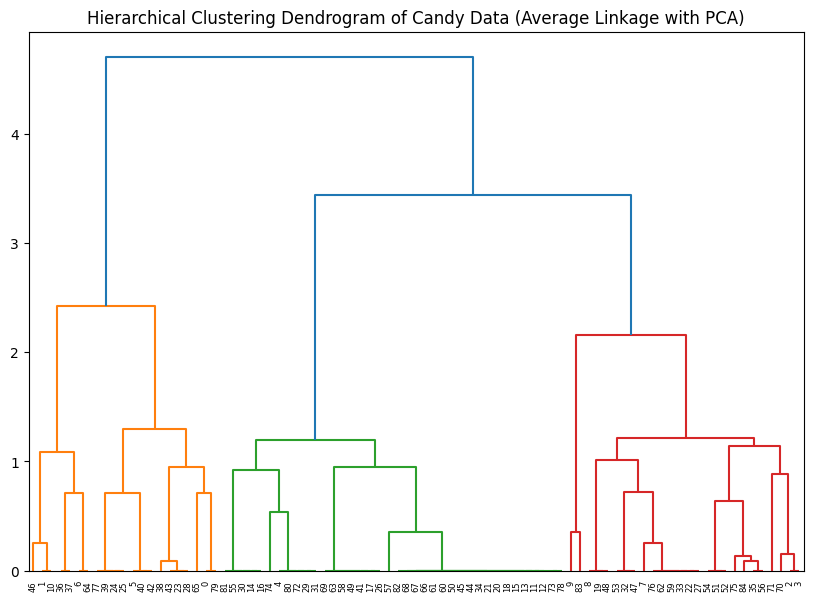

In [426]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop winpercent, sugarpercent and pricepercent for PCA and dendrogram
df_numeric_pca_dendro = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
scaler_pca_dendro = StandardScaler()
df_scaled_pca_dendro = pd.DataFrame(scaler_pca_dendro.fit_transform(df_numeric_pca_dendro), columns=df_numeric_pca_dendro.columns)

# Apply PCA again after dropping columns
pca_dendro = PCA(n_components=2)
df_pca_dendro = pca_dendro.fit_transform(df_scaled_pca_dendro)


# Dendrogram for 'average' linkage with PCA
linked_average_pca = linkage(df_pca_dendro, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked_average_pca)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (Average Linkage with PCA)")
plt.show()

In [427]:
# Data for 8 new candies (example data, replace with actual data if available)
new_candies_data = {
    'competitorname': ['Rhodesia', 'Bon o Bon', 'Mentitas', 'Alfajor', 'Tita', 'Turron Arcor', 'Gomitas Mogul', 'Booballo (No Pluribus)'],
    'chocolate': [1, 1, 0, 1, 1, 0, 0, 0],
    'fruity': [0, 0, 0, 0, 0, 0, 1, 0],
    'caramel': [0, 0, 0, 1, 0, 0, 0, 0],
    'peanutyalmondy': [0, 1, 0, 0, 0, 1, 0, 0],
    'nougat': [0, 0, 0, 0, 0, 1, 0, 0],
    'crispedricewafer': [1, 1, 0, 1, 1, 1, 0, 0],
    'hard': [0, 0, 1, 0, 0, 0, 0, 0],
    'bar': [1, 0, 0, 0, 1, 1, 0, 0],
    'pluribus': [0, 0, 1, 0, 0, 0, 1, 0],
    'sugarpercent': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    'pricepercent': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    'winpercent': [70.0, 40.0, 75.0, 35.0, 80.0, 45.0, 85.0, 30.0]
}

df_new_candies = pd.DataFrame(new_candies_data)

display(df_new_candies)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Rhodesia,1,0,0,0,0,1,0,1,0,0.5,0.5,70.0
1,Bon o Bon,1,0,0,1,0,1,0,0,0,0.5,0.5,40.0
2,Mentitas,0,0,0,0,0,0,1,0,1,0.5,0.5,75.0
3,Alfajor,1,0,1,0,0,1,0,0,0,0.5,0.5,35.0
4,Tita,1,0,0,0,0,1,0,1,0,0.5,0.5,80.0
5,Turron Arcor,0,0,0,1,1,1,0,1,0,0.5,0.5,45.0
6,Gomitas Mogul,0,1,0,0,0,0,0,0,1,0.5,0.5,85.0
7,Booballo (No Pluribus),0,0,0,0,0,0,0,0,0,0.5,0.5,30.0


In [428]:
# Drop winpercent, sugarpercent and pricepercent from original data
df_numeric_no_win = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent', 'cluster', 'cluster_pca'], axis=1) # Also drop cluster columns

# Scale the original data
scaler_no_win = StandardScaler()
df_scaled_no_win = pd.DataFrame(scaler_no_win.fit_transform(df_numeric_no_win), columns=df_numeric_no_win.columns)

# Drop competitorname, sugarpercent, pricepercent, winpercent, and assigned_cluster from new candy data
df_new_candies_numeric = df_new_candies.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)

# Standardize the new candy data using the *same* scaler fitted on the original data
df_new_candies_scaled = pd.DataFrame(scaler_no_win.transform(df_new_candies_numeric), columns=df_new_candies_numeric.columns)


# Combine scaled original data with scaled new candy data
df_combined_scaled = pd.concat([df_scaled_no_win, df_new_candies_scaled], ignore_index=True)

display(df_combined_scaled.tail(8)) # Display the scaled data for the new candies

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
85,1.138990,-0.899172,-0.444053,-0.444053,-0.299572,3.338092,-0.462910,1.745743,-1.035940
86,1.138990,-0.899172,-0.444053,2.251983,-0.299572,3.338092,-0.462910,-0.572822,-1.035940
87,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,2.160247,-0.572822,0.965307
88,1.138990,-0.899172,2.251983,-0.444053,-0.299572,3.338092,-0.462910,-0.572822,-1.035940
89,1.138990,-0.899172,-0.444053,-0.444053,-0.299572,3.338092,-0.462910,1.745743,-1.035940
90,-0.877971,-0.899172,-0.444053,2.251983,3.338092,3.338092,-0.462910,1.745743,-1.035940
91,-0.877971,1.112134,-0.444053,-0.444053,-0.299572,-0.299572,-0.462910,-0.572822,0.965307
92,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.462910,-0.572822,-1.035940


In [429]:
from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering on the combined and scaled data using 'average' linkage
linked_combined = linkage(df_combined_scaled, method='average')

In [430]:
from scipy.cluster.hierarchy import fcluster

# Assign new candies to clusters based on the hierarchical clustering results
# We take the last 8 rows of the linked_combined as they correspond to the new candies
num_clusters = 4 # We want to assign to the existing 4 clusters
new_candy_clusters = fcluster(linked_combined, num_clusters, criterion='maxclust')[-8:]

df_new_candies['assigned_cluster'] = new_candy_clusters

display(df_new_candies[['competitorname', 'assigned_cluster']])

,competitorname,assigned_cluster
0,Rhodesia,3
1,Bon o Bon,3
2,Mentitas,4
3,Alfajor,3
4,Tita,3
5,Turron Arcor,2
6,Gomitas Mogul,4
7,Booballo (No Pluribus),4


In [435]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler

# Ensure df_scaled_no_win is available and correctly calculated
df_numeric_no_win = df_candy.drop(['competitorname', 'sugarpercent', 'pricepercent', 'winpercent', 'cluster', 'cluster_pca'], axis=1)
scaler_no_win = StandardScaler()
df_scaled_no_win = pd.DataFrame(scaler_no_win.fit_transform(df_numeric_no_win), columns=df_numeric_no_win.columns)

# Ensure cluster_centroids is calculated based on original data
cluster_centroids = df_scaled_no_win.groupby(df_candy['cluster']).mean()

# Calculate average distance to centroid for original clusters
average_distance_to_centroid_original = {}
for cluster_id in sorted(df_candy['cluster'].unique()):
    cluster_df_scaled = df_scaled_no_win[df_candy['cluster'] == cluster_id]
    if not cluster_df_scaled.empty:
        centroid = cluster_centroids.loc[cluster_id]
        distances = [np.linalg.norm(row - centroid) for index, row in cluster_df_scaled.iterrows()]
        average_distance_to_centroid_original[cluster_id] = np.mean(distances)
    else:
        average_distance_to_centroid_original[cluster_id] = np.nan # Handle empty clusters

# Calculate average distance to centroid for clusters with new candies
average_distance_to_centroid_combined = {}
# Ensure df_combined_scaled and linked_combined are available and correctly calculated
# This part assumes that df_combined_scaled and linked_combined were generated correctly in preceding cells
combined_clusters = fcluster(linked_combined, num_clusters, criterion='maxclust')
combined_cluster_centroids = df_combined_scaled.groupby(combined_clusters).mean()


for cluster_id in sorted(np.unique(combined_clusters)):
    cluster_df_combined_scaled = df_combined_scaled[combined_clusters == cluster_id]
    if not cluster_df_combined_scaled.empty:
        centroid = combined_cluster_centroids.loc[cluster_id]
        distances = [np.linalg.norm(row - centroid) for index, row in cluster_df_combined_scaled.iterrows()]
        average_distance_to_centroid_combined[cluster_id] = np.mean(distances)
    else:
        average_distance_to_centroid_combined[cluster_id] = np.nan # Handle empty clusters

# Create a DataFrame for clear table display
comparison_df = pd.DataFrame({
    'Average Distance (Original)': pd.Series(average_distance_to_centroid_original),
    'Average Distance (with New Candies)': pd.Series(average_distance_to_centroid_combined)
})


print("Comparison of Average Distance to Centroid per Cluster:")
display(comparison_df)

Comparison of Average Distance to Centroid per Cluster:


,Average Distance (Original),Average Distance (with New Candies)
1,1.548610,1.763312
2,1.984075,1.818832
3,1.840349,1.926404
4,2.371919,2.350230


In [432]:
from sklearn.metrics import silhouette_samples

# Calculate silhouette scores for each sample in the original dataset (without new candies)
silhouette_values_original = silhouette_samples(df_scaled_no_win, df_candy['cluster'])

# Add the silhouette scores and original cluster assignments to a temporary DataFrame
df_original_analysis = df_scaled_no_win.copy()
df_original_analysis['cluster'] = df_candy['cluster']
df_original_analysis['silhouette_score'] = silhouette_values_original

# Calculate the average silhouette score for each original cluster
average_silhouette_per_cluster_original = df_original_analysis.groupby('cluster')['silhouette_score'].mean()

print("Average Silhouette Score per Cluster (Original Data):")
display(average_silhouette_per_cluster_original)

print("\nAverage Silhouette Score per Cluster (with New Candies):")
display(average_silhouette_per_cluster)

Average Silhouette Score per Cluster (Original Data):


,silhouette_score
cluster,
1,0.522616
2,0.468548
3,0.482190
4,0.143720



Average Silhouette Score per Cluster (with New Candies):


,silhouette_score
cluster,
1,0.438532
2,0.155319
3,0.501574
4,0.401739


In [433]:
import numpy as np

# Calculate the centroids of the clusters using the scaled data (without winpercent, sugarpercent, pricepercent, or cluster columns)
cluster_centroids = df_scaled_no_win.groupby(df_candy['cluster']).mean()

# Calculate the distance of each new candy to its assigned cluster centroid
distances_to_centroid = {}

for index, row in df_new_candies.iterrows():
    candy_name = row['competitorname']
    assigned_cluster_id = row['assigned_cluster']

    # Get the scaled characteristics of the new candy (excluding non-numeric and dropped columns)
    # Ensure the order of columns matches the data used to calculate centroids
    candy_scaled_features = df_new_candies_scaled.loc[index]


    # Get the centroid of the assigned cluster
    assigned_centroid = cluster_centroids.loc[assigned_cluster_id]

    # Calculate the Euclidean distance
    distance = np.linalg.norm(candy_scaled_features - assigned_centroid)

    distances_to_centroid[candy_name] = distance

# Display the distances
print("Distance of Each New Candy to its Assigned Cluster Centroid:")
for candy, distance in distances_to_centroid.items():
    print(f"{candy}: {distance:.4f}")

Distance of Each New Candy to its Assigned Cluster Centroid:
Rhodesia: 1.2942
Bon o Bon: 3.2721
Mentitas: 3.2899
Alfajor: 2.5599
Tita: 1.2942
Turron Arcor: 4.5791
Gomitas Mogul: 2.8565
Booballo (No Pluribus): 2.0587
